DBA4811 Homework 2 <br>
Name: Owyong Zi Xin <br>
Matric Number: A0190350N

# Import Libraries

In [51]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from numpy.polynomial.polynomial import polyfit
from IPython.core.display import display, HTML

# Importing Datasets

In [52]:
file1 = 'LaLiga_player_stats.csv'
d1 = pd.read_csv(file1)
d1n = 'Name'
d1[d1n] = d1[d1n].apply(lambda x: x.strip())
d1nc = d1[d1n].value_counts() == 1
d1nr = d1nc[d1nc].index

dP = [i for i in d1.columns if i.find('Percentage') != -1]
if d1[dP].dtypes[0] == 'object':
    for i in dP:
        d1[i] = d1[i].apply(lambda x: float(x.strip('%'))/100)

file2 = 'LaLiga_player_ratings_salaries.csv'
d2 = pd.read_csv(file2)
d2n = 'Player'
d2[d2n] = d2[d2n].apply(lambda x: x.strip())
d2nc = d2[d2n].value_counts() == 1
d2nr = d2nc[d2nc].index

d2 = d2.loc[d2[d2[d2n].isin(d2nr)].index, :]

n = [n for n in d1nr if n in d2nr]
for p in n:
    d1.loc[d1[d1[d1n].isin([p])].index, ['Rating', 'Salary']] = list(
        d2.loc[d2[d2[d2n].isin([p])].index, ['Rating', 'Salary']].iloc[0, :])

d2.drop(d2[d2[d2n].isin(n)].index, inplace=True)
d1nr = [i for i in d1nr if not i in n]

d2['Player2'] = d2['Player'].apply(lambda x: x.replace(x if x.find(' ') == -1 else x[:x.find(' ')], x[:1] + '.').strip())

d2n = 'Player2'
d2nc = d2[d2n].value_counts() == 1
d2nr = d2nc[d2nc].index

d2 = d2.loc[d2[d2[d2n].isin(d2nr)].index, :]

n = [n for n in d1nr if n in d2nr]
for p in n:
    d1.loc[d1[d1[d1n].isin([p])].index, ['Rating', 'Salary']] = list(
        d2.loc[d2[d2[d2n].isin([p])].index, ['Rating', 'Salary']].iloc[0, :])

In [53]:
d1 #stats

,Name,Name1,Name2,Name3,Name4,Team,Position,Shirt number,Minutes played,Games played,...,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt,Rating,Salary
0,A. Ba,A.,Ba,NaN,NaN,Rayo Vallecano,Defender,21.0,2.111,26,...,197,94,103,1.049,838.000,210,1,1,6.78,NaN
1,A. Barragán,A.,Barragán,NaN,NaN,Real Betis,Defender,19.0,936.000,14,...,88,65,23,523.000,494.000,29,0,0,NaN,NaN
2,A. Guardado,A.,Guardado,NaN,NaN,Real Betis,Midfielder,18.0,2.338,31,...,239,193,46,1.592,1.436,149,7,0,6.55,NaN
3,A. Remiro,A.,Remiro,NaN,NaN,Athletic Club,Goalkeeper,1.0,0.000,0,...,0,0,0,0.000,0.000,0,0,0,NaN,NaN
4,Èric Montes,Èric,Montes,NaN,NaN,Girona FC,Defender,28.0,0.000,0,...,0,0,0,0.000,0.000,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,Yuri B.,Yuri,B.,NaN,NaN,Athletic Club,Defender,12.0,3.120,35,...,373,254,119,1.367,1.273,92,2,1,NaN,NaN
552,Zaldúa,Zaldúa,NaN,NaN,NaN,Real Sociedad,Defender,2.0,2.141,26,...,267,189,78,899.000,788.000,111,0,1,NaN,NaN
553,Zourdine Thior,Zourdine,Thior,NaN,NaN,Real Sociedad,Midfielder,38.0,0.000,0,...,0,0,0,0.000,0.000,0,0,0,NaN,NaN
554,Zubeldia,Zubeldia,NaN,NaN,NaN,Real Sociedad,Midfielder,5.0,2.551,33,...,322,207,115,1.200,1.071,129,0,0,NaN,NaN


In [54]:
d2 #salaries

,Player,PlayerName1,PlayerName2,PlayerName3,Rating,Salary,Player2
0,Abdoulaye Ba,Abdoulaye,Ba,NaN,6.78,NaN,A. Ba
1,Adnan Januzaj,Adnan,Januzaj,NaN,7.04,NaN,A. Januzaj
3,Aissa Mandi,Aissa,Mandi,NaN,6.67,NaN,A. Mandi
6,Álex Granell,Álex,Granell,NaN,6.87,NaN,Á. Granell
8,Alfonso Pedraza,Alfonso,Pedraza,NaN,6.72,NaN,A. Pedraza
...,...,...,...,...,...,...,...
296,Xabier Etxeita,Xabier,Etxeita,NaN,6.69,NaN,X. Etxeita
298,Yassine Bounou,Yassine,Bounou,NaN,6.73,NaN,Y. Bounou
299,Yeray Álvarez,Yeray,Álvarez,NaN,6.98,NaN,Y. Álvarez
301,Yuri,Yuri,NaN,NaN,6.87,NaN,Y.


# Cleaning Datasets

In [55]:
# making rating the first column since it is the dependent variable 

mid = d1['Rating']
d1.drop(labels=['Rating'], axis=1, inplace = True)
d1.insert(0, 'Rating', mid)
d1.head(10)
#d1.to_excel('combined.xlsx')

,Rating,Name,Name1,Name2,Name3,Name4,Team,Position,Shirt number,Minutes played,...,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt,Salary
0,6.78,A. Ba,A.,Ba,NaN,NaN,Rayo Vallecano,Defender,21.0,2.111,...,46,197,94,103,1.049,838.000,210,1,1,NaN
1,NaN,A. Barragán,A.,Barragán,NaN,NaN,Real Betis,Defender,19.0,936.000,...,14,88,65,23,523.000,494.000,29,0,0,NaN
2,6.55,A. Guardado,A.,Guardado,NaN,NaN,Real Betis,Midfielder,18.0,2.338,...,25,239,193,46,1.592,1.436,149,7,0,NaN
3,NaN,A. Remiro,A.,Remiro,NaN,NaN,Athletic Club,Goalkeeper,1.0,0.000,...,0,0,0,0,0.000,0.000,0,0,0,NaN
4,NaN,Èric Montes,Èric,Montes,NaN,NaN,Girona FC,Defender,28.0,0.000,...,0,0,0,0,0.000,0.000,0,0,0,NaN
5,NaN,Óscar,Óscar,NaN,NaN,NaN,CD Leganés,Midfielder,NaN,2.515,...,46,324,255,69,950.000,842.000,106,2,2,NaN
6,6.69,Óscar Plano,Óscar,Plano,NaN,NaN,R. Valladolid CF,Midfielder,10.0,2.696,...,63,402,302,100,771.000,714.000,56,1,2,NaN
7,NaN,Álex Blanco,Álex,Blanco,NaN,NaN,D. Alavés,Midfielder,NaN,14.000,...,1,4,4,0,6.000,6.000,0,0,0,NaN
8,NaN,Álex Domínguez,Álex,Domínguez,NaN,NaN,D. Alavés,Goalkeeper,31.0,0.000,...,0,0,0,0,0.000,0.000,0,0,0,NaN
9,6.47,Álex Gallar,Álex,Gallar,NaN,NaN,SD Huesca,Midfielder,11.0,1.002,...,15,121,112,9,407.000,366.000,39,2,2,NaN


#### Dropping irrelevant columns

In [56]:
# dropping names and salary
d1.drop(columns=['Name','Name1','Name2','Name3','Name4','Salary'], inplace=True)
d1

,Rating,Team,Position,Shirt number,Minutes played,Games played,Percentage of games played,Full games played,Percentage of full games played,Games started,...,Corners,Tackles.1,Duels,Man-to-man duels,Aerial duels,Passes,Short passes,Long passes,Through balls,Goals scored per attempt
0,6.78,Rayo Vallecano,Defender,21.0,2.111,26,0.68,21,0.55,25,...,0,46,197,94,103,1.049,838.000,210,1,1
1,NaN,Real Betis,Defender,19.0,936.000,14,0.37,7,0.18,12,...,0,14,88,65,23,523.000,494.000,29,0,0
2,6.55,Real Betis,Midfielder,18.0,2.338,31,0.82,19,0.50,27,...,23,25,239,193,46,1.592,1.436,149,7,0
3,NaN,Athletic Club,Goalkeeper,1.0,0.000,0,0.00,0,0.00,0,...,0,0,0,0,0,0.000,0.000,0,0,0
4,NaN,Girona FC,Defender,28.0,0.000,0,0.00,0,0.00,0,...,0,0,0,0,0,0.000,0.000,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,NaN,Athletic Club,Defender,12.0,3.120,35,0.92,33,0.87,35,...,2,48,373,254,119,1.367,1.273,92,2,1
552,NaN,Real Sociedad,Defender,2.0,2.141,26,0.68,21,0.55,25,...,0,39,267,189,78,899.000,788.000,111,0,1
553,NaN,Real Sociedad,Midfielder,38.0,0.000,0,0.00,0,0.00,0,...,0,0,0,0,0,0.000,0.000,0,0,0
554,NaN,Real Sociedad,Midfielder,5.0,2.551,33,0.87,23,0.61,29,...,0,61,322,207,115,1.200,1.071,129,0,0


# Checking for collinearity and delete collinear Xs

#### Check for correlation


Correlation heatmaps:


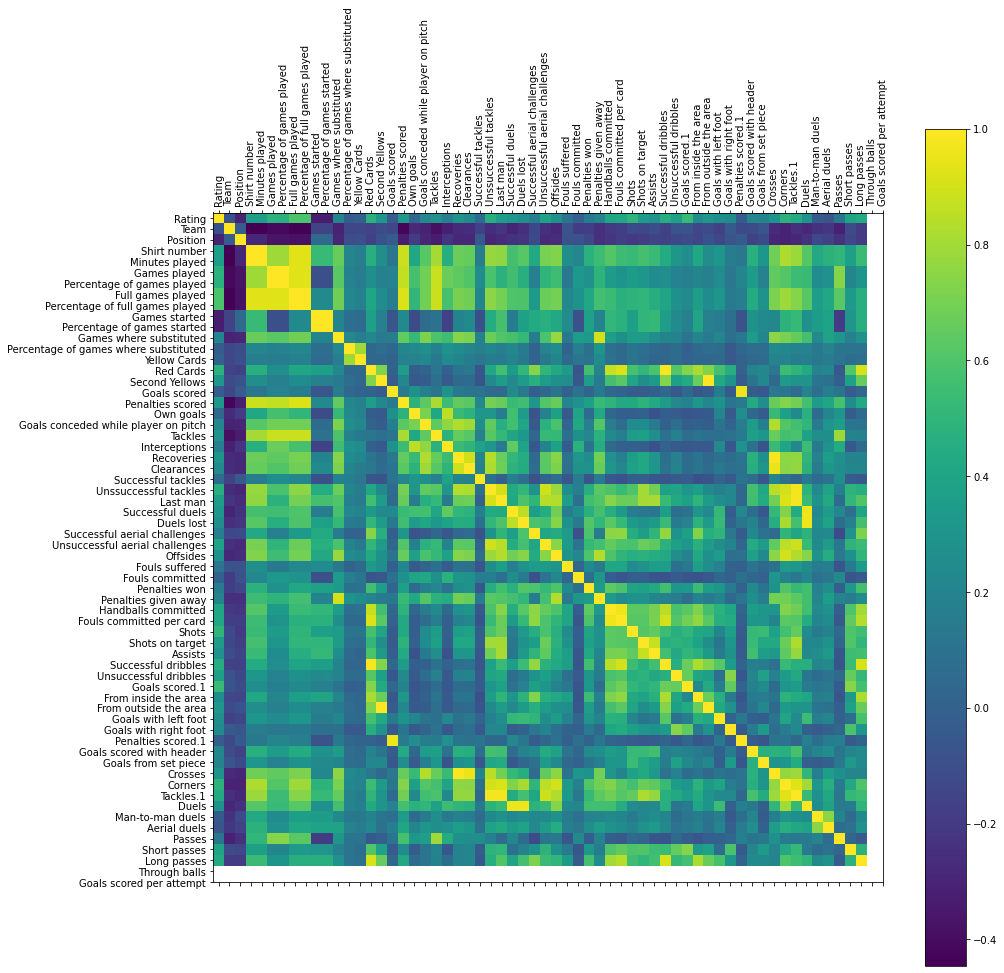

In [57]:
# looking out for any strong correlation between columns 

plt.rcParams["figure.figsize"] = (15, 15)

print('\nCorrelation heatmaps:')
plt.matshow(d1.corr()) # matrix of correlations
plt.xticks(range(len(d1.columns)), d1.columns, rotation=90) # rotate x labels so less likelihood of overlaps
plt.yticks(range(len(d1.columns)), d1.columns)

plt.colorbar() # lighter color represents higher correlations
plt.show()

### Delete collinear columns

In [58]:
#Regression with collinearity handled

#algorithm is inefficient but clearer for instructional purposes

warnings.filterwarnings('ignore')

#renaming the columns
for name in list(d1):
    new_name = name.replace(' ', '_').replace('-', '_').replace('.', '_')
    d1.rename(columns={name:new_name}, inplace=True)

df = d1
y = 'Rating'

#delete non-numeric columns:
df = df.select_dtypes(['number'])
#delete any row with any missing value:
df.dropna(how='any', inplace=True)

#get column names:
colname = list(df)

#move y to position 0:
colname.insert(0, colname.pop(colname.index(y)))

df = df[colname]

df0 = df.copy()

#delete any x too highly correlated with another x, to avoid collinearity

corv = pd.DataFrame() #start empty dataframe for corr(Xs, y) to come
for x in list(df)[1:]:
    #during 1st time thru loop, new column, with label, created in empty dataframe
    corv.loc[x, y] = df[x].corr(df[y]) #new entry, with row label, added to dataframe

corv = corv.loc[abs(corv).sort_values([y]).index, :] #corr(Xs, y) ranked

delta = 0.005 #corr difference lower limit
dl2 = []
icorr = True
while icorr:
    a = abs(corv).diff() <= delta #adjacent rows with similar abs(corr(Xs, y))
    colname = list(df)[1:]
    dl = []
    print('\nX pairs with correlations >', 1 - delta, ':')
    for b in range(1, a.shape[0]):
        if a.iloc[b, 0]:
            if abs(df[a.index[b - 1]].corr(df[a.index[b]])) > 1 - delta:
                #deleting 1 X from correlated pair:
                dv0 = a.index[b - 1]
                dv1 = a.index[b]

                #neither should already be deleted:
                if not (dv0 in dl) and not (dv1 in dl):
                    #delete x with rather lower corr(x, y):
                    if abs(corv.loc[dv0, y]) - abs(corv.loc[dv1, y]) >= delta:
                        d = dv1
                    elif len(dv0) < len(dv1): #delete x with longer name:
                        d = dv1
                    else:
                        d = dv0

                    dl.append(d) #for en masse deletion later
                    corv.drop([d], axis=0, inplace=True) #delete from column of corr with y

                    print(dv0,',',dv1)

    if len(dl) > 0:
        df.drop(axis=1, columns=dl, inplace=True) #variables deleted en masse
        dl2 = dl2 + dl #keep for real deletion later
        print('\n' + str(len(dl)), 'variables considered for deletion:')
        print('\n'.join([str(x) for x in dl]))
    else:
        print('(no more)')
        icorr = False

#remaining Xs may be collinear
print('\n' + str(len(dl2)), 'collinear variables deleted.')

#potential collinearity issues handled

df0 = df.copy() #kept for inclusion of interaction variables later
#df = df0
    
#perform feature selection using adjusted R2

modeleq = ' + '.join(list(df)).replace('+', '~', 1)
#print(modeleq)

maxR2 = -np.inf
bmodeleq = modeleq
numx = df.shape[1] - 1

while True:
    regout = ols(modeleq, df).fit()
    R2 = regout.rsquared_adj
    #see if a better model is found:
    if R2 > maxR2:
        maxR2 = R2
        bmodeleq = modeleq

    print('\nAdjusted R2 =', R2, 'for', numx, 'Xs.')

    if numx == 1:
        print('Variable left:', modeleq[modeleq.find('~') + 2 :])
        #one xvar left
        #get out of 'while' loop:
        break
            
    #identify X variable to delete by finding the one with smallest abs(t-stat):
    t = regout.tvalues[1:]
    xdrop = list(t[abs(t) == min(abs(t))].index)[0]
    print('Variable to drop:', xdrop)
    
    df.drop(xdrop, axis=1, inplace=True)
    modeleq = ' + '.join(list(df)).replace('+', '~', 1)
    
    numx = numx - 1

print('\nBest model has', bmodeleq.count('+') + 1, 'Xs:')
out = ols(bmodeleq, df0).fit()
#collinearity is still entirely possible at this stage
print(out.summary2())

print("\nDescending order of X's significance:")
print('\n'.join(list(abs(out.tvalues[1:]).sort_values(0, ascending=False).index)))
#if the single best variable isn't high in above ranking, collinearity might be an issue


X pairs with correlations > 0.995 :
Penalties_scored , Goals_with_right_foot
Games_where_substituted , Percentage_of_games_where_substituted
Percentage_of_games_played , Games_played
Games_started , Percentage_of_games_started

4 variables considered for deletion:
Goals_with_right_foot
Percentage_of_games_where_substituted
Percentage_of_games_played
Percentage_of_games_started

X pairs with correlations > 0.995 :
(no more)

4 collinear variables deleted.

Adjusted R2 = 0.8209479520151735 for 55 Xs.
Variable to drop: Penalties_given_away

Adjusted R2 = 0.8233644803532743 for 54 Xs.
Variable to drop: Penalties_won

Adjusted R2 = 0.825702913628595 for 53 Xs.
Variable to drop: Last_man

Adjusted R2 = 0.8279501510244153 for 52 Xs.
Variable to drop: Through_balls

Adjusted R2 = 0.8301047738149921 for 51 Xs.
Variable to drop: Goals_scored_per_attempt

Adjusted R2 = 0.8320915852427122 for 50 Xs.
Variable to drop: Fouls_committed

Adjusted R2 = 0.8336477905081281 for 49 Xs.
Variable to drop: F

In [59]:
# Keeping the most significant Xs and Y 
combined_d1 = d1[['Team', 'Position', 'Rating','Aerial_duels', 'Successful_dribbles', 'Goals_conceded_while_player_on_pitch', 'Assists', 'Successful_aerial_challenges', 'Games_where_substituted','Percentage_of_full_games_played', 'Full_games_played', 'Interceptions', 'Games_played', 'Penalties_scored', 'Yellow_Cards','Unsuccessful_aerial_challenges','Recoveries','Goals_from_set_piece','Long_passes','Fouls_suffered','Minutes_played','Unsuccessful_dribbles','Own_goals','From_outside_the_area','Crosses','Penalties_scored_1','Goals_with_left_foot','Games_started','Handballs_committed','Goals_scored','Unssuccessful_tackles','Successful_tackles','Tackles_1','Corners']]

In [60]:
#check data
combined_d1.dropna(axis=0, inplace=True)
combined_d1_cat = combined_d1[['Team', 'Position']]
combined_d1_num = combined_d1[['Rating','Aerial_duels', 'Successful_dribbles', 'Goals_conceded_while_player_on_pitch', 'Assists', 'Successful_aerial_challenges', 'Games_where_substituted','Percentage_of_full_games_played', 'Full_games_played', 'Interceptions', 'Games_played', 'Penalties_scored', 'Yellow_Cards','Unsuccessful_aerial_challenges','Recoveries','Goals_from_set_piece','Long_passes','Fouls_suffered','Minutes_played','Unsuccessful_dribbles','Own_goals','From_outside_the_area','Crosses','Penalties_scored_1','Goals_with_left_foot','Games_started','Handballs_committed','Goals_scored','Unssuccessful_tackles','Successful_tackles','Tackles_1','Corners']]

# Adding missing dummies (Encode Categorical Variables)

In [61]:
# current data
combined_d1_num

,Rating,Aerial_duels,Successful_dribbles,Goals_conceded_while_player_on_pitch,Assists,Successful_aerial_challenges,Games_where_substituted,Percentage_of_full_games_played,Full_games_played,Interceptions,...,Crosses,Penalties_scored_1,Goals_with_left_foot,Games_started,Handballs_committed,Goals_scored,Unssuccessful_tackles,Successful_tackles,Tackles_1,Corners
0,6.78,103,4,34,0,69,5,0.55,21,29,...,1,1,0,25,2,1,13,33,46,0
2,6.55,46,23,40,4,16,12,0.50,19,28,...,35,0,0,27,1,0,10,15,25,23
6,6.69,100,25,47,4,36,10,0.61,23,22,...,32,1,0,30,2,3,18,45,63,32
9,6.47,9,19,25,1,4,22,0.08,3,9,...,25,0,1,10,3,4,6,9,15,23
11,6.73,75,56,60,1,30,4,0.84,32,41,...,103,0,1,36,3,1,25,39,64,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,6.79,57,43,37,5,40,10,0.53,20,12,...,3,0,0,26,1,0,18,27,45,0
543,7.00,177,50,39,4,79,19,0.50,19,7,...,31,1,11,36,4,13,9,18,27,1
544,6.74,91,19,27,5,42,13,0.47,18,1,...,13,2,9,28,5,11,2,3,5,0
546,6.88,91,15,35,2,49,5,0.68,26,47,...,43,1,0,28,1,2,22,35,57,0


In [62]:
combined_new = combined_d1_num[list(abs(out.tvalues[1:]).sort_values(0, ascending=False).index)]
combined_new.insert(0, 'Rating', combined_d1['Rating'])
combined_new['Team'] = combined_d1_cat['Team']
combined_new['Position'] = combined_d1_cat['Position']

In [63]:
# data to use
combined_new

,Rating,Aerial_duels,Successful_dribbles,Goals_conceded_while_player_on_pitch,Assists,Successful_aerial_challenges,Games_where_substituted,Percentage_of_full_games_played,Full_games_played,Interceptions,...,Goals_with_left_foot,Games_started,Handballs_committed,Goals_scored,Unssuccessful_tackles,Successful_tackles,Tackles_1,Corners,Team,Position
0,6.78,103,4,34,0,69,5,0.55,21,29,...,0,25,2,1,13,33,46,0,Rayo Vallecano,Defender
2,6.55,46,23,40,4,16,12,0.50,19,28,...,0,27,1,0,10,15,25,23,Real Betis,Midfielder
6,6.69,100,25,47,4,36,10,0.61,23,22,...,0,30,2,3,18,45,63,32,R. Valladolid CF,Midfielder
9,6.47,9,19,25,1,4,22,0.08,3,9,...,1,10,3,4,6,9,15,23,SD Huesca,Midfielder
11,6.73,75,56,60,1,30,4,0.84,32,41,...,1,36,3,1,25,39,64,0,Rayo Vallecano,Defender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,6.79,57,43,37,5,40,10,0.53,20,12,...,0,26,1,0,18,27,45,0,Real Betis,Midfielder
543,7.00,177,50,39,4,79,19,0.50,19,7,...,11,36,4,13,9,18,27,1,Athletic Club,Forward
544,6.74,91,19,27,5,42,13,0.47,18,1,...,9,28,5,11,2,3,5,0,Real Sociedad,Forward
546,6.88,91,15,35,2,49,5,0.68,26,47,...,0,28,1,2,22,35,57,0,D. Alavés,Defender


#### Encoding categorical variables 

In [64]:
print('\nThe dataset has', len(combined_new), 'rows and', combined_new.shape[1], 'columns.') #len(combined) == combined.shape[0]
print('\nColumns are:', list(combined_new))

#create categorical dummies:
#encode text variable 'Team'
print("\n\nUnique values in text variable 'Team':", sorted(set(combined_new['Team'].dropna()))
      + ([np.nan] if combined_new['Team'].isnull().sum() > 0 else []))

#turn text variable Team into categorical dummies
#use short prefix 'Team'; first category AVE's dummy will be dropped
d1 = pd.get_dummies(combined_new['Team'], prefix='Team', drop_first=True)
print("\nCategorical dummies from text variable 'Team':\n")
print(d1.head(10))


#encode text variable 'Position'
print("\n\nUnique values in text variable 'Position':", sorted(set(combined_new['Position'].dropna()))
      + ([np.nan] if combined_new['Position'].isnull().sum() > 0 else []))

#turn text variable smoker into categorical dummies
#use short prefix 'sm'; first category AVE's dummy will be dropped
d2 = pd.get_dummies(combined_new['Position'], prefix='P', drop_first=True)

print("\nCategorical dummies from text variable 'Position':\n")
print(d2.head(10))


#reconstitute dataframe d:

combined_new = pd.concat([combined_new.drop(['Team', 'Position'], axis=1), d1, d2], axis=1)
print('\n\nReconstituted dataset has', len(d), 'rows.\n')
print(combined_new.head())


The dataset has 125 rows and 34 columns.

Columns are: ['Rating', 'Aerial_duels', 'Successful_dribbles', 'Goals_conceded_while_player_on_pitch', 'Assists', 'Successful_aerial_challenges', 'Games_where_substituted', 'Percentage_of_full_games_played', 'Full_games_played', 'Interceptions', 'Games_played', 'Penalties_scored', 'Yellow_Cards', 'Unsuccessful_aerial_challenges', 'Recoveries', 'Goals_from_set_piece', 'Long_passes', 'Fouls_suffered', 'Minutes_played', 'Unsuccessful_dribbles', 'Own_goals', 'From_outside_the_area', 'Crosses', 'Penalties_scored_1', 'Goals_with_left_foot', 'Games_started', 'Handballs_committed', 'Goals_scored', 'Unssuccessful_tackles', 'Successful_tackles', 'Tackles_1', 'Corners', 'Team', 'Position']


Unique values in text variable 'Team': ['Athletic Club', 'Atlético de Madrid', 'CD Leganés', 'D. Alavés', 'FC Barcelona', 'Getafe CF', 'Girona FC', 'Levante UD', 'R. Valladolid CF', 'RC Celta', 'RCD Espanyol', 'Rayo Vallecano', 'Real Betis', 'Real Madrid', 'Real Soci

In [65]:
for name in list(combined_new):
    new_name = name.replace(' ', '_').replace('-', '_').replace('.', '_').replace(' ', '_')
    combined_new.rename(columns={name:new_name}, inplace=True)

In [66]:
#latest data with encoded position
combined_new

,Rating,Aerial_duels,Successful_dribbles,Goals_conceded_while_player_on_pitch,Assists,Successful_aerial_challenges,Games_where_substituted,Percentage_of_full_games_played,Full_games_played,Interceptions,...,Team_Real_Madrid,Team_Real_Sociedad,Team_SD_Eibar,Team_SD_Huesca,Team_Sevilla_FC,Team_Valencia_CF,Team_Villarreal_CF,P_Forward,P_Goalkeeper,P_Midfielder
0,6.78,103,4,34,0,69,5,0.55,21,29,...,0,0,0,0,0,0,0,0,0,0
2,6.55,46,23,40,4,16,12,0.50,19,28,...,0,0,0,0,0,0,0,0,0,1
6,6.69,100,25,47,4,36,10,0.61,23,22,...,0,0,0,0,0,0,0,0,0,1
9,6.47,9,19,25,1,4,22,0.08,3,9,...,0,0,0,1,0,0,0,0,0,1
11,6.73,75,56,60,1,30,4,0.84,32,41,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,6.79,57,43,37,5,40,10,0.53,20,12,...,0,0,0,0,0,0,0,0,0,1
543,7.00,177,50,39,4,79,19,0.50,19,7,...,0,0,0,0,0,0,0,1,0,0
544,6.74,91,19,27,5,42,13,0.47,18,1,...,0,1,0,0,0,0,0,1,0,0
546,6.88,91,15,35,2,49,5,0.68,26,47,...,0,0,0,0,0,0,0,0,0,0


#### Test model with latest data

In [67]:
Xvars = ' + '.join(list(combined_new)[1:])
modeleq = 'Rating' + ' ~ ' + Xvars
print(ols(modeleq, combined_new).fit().summary2())

                           Results: Ordinary least squares
Model:                     OLS                    Adj. R-squared:           0.880    
Dependent Variable:        Rating                 AIC:                      -241.8344
Date:                      2021-04-01 23:24       BIC:                      -94.7620 
No. Observations:          125                    Log-Likelihood:           172.92   
Df Model:                  51                     F-statistic:              18.86    
Df Residuals:              73                     Prob (F-statistic):       1.20e-26 
R-squared:                 0.929                  Scale:                    0.0063032
-------------------------------------------------------------------------------------
                                      Coef.  Std.Err.    t    P>|t|   [0.025   0.975]
-------------------------------------------------------------------------------------
Intercept                             6.6567   0.0855 77.8910 0.0000   6.4864  6.

In [68]:
#checking data

combined_new

,Rating,Aerial_duels,Successful_dribbles,Goals_conceded_while_player_on_pitch,Assists,Successful_aerial_challenges,Games_where_substituted,Percentage_of_full_games_played,Full_games_played,Interceptions,...,Team_Real_Madrid,Team_Real_Sociedad,Team_SD_Eibar,Team_SD_Huesca,Team_Sevilla_FC,Team_Valencia_CF,Team_Villarreal_CF,P_Forward,P_Goalkeeper,P_Midfielder
0,6.78,103,4,34,0,69,5,0.55,21,29,...,0,0,0,0,0,0,0,0,0,0
2,6.55,46,23,40,4,16,12,0.50,19,28,...,0,0,0,0,0,0,0,0,0,1
6,6.69,100,25,47,4,36,10,0.61,23,22,...,0,0,0,0,0,0,0,0,0,1
9,6.47,9,19,25,1,4,22,0.08,3,9,...,0,0,0,1,0,0,0,0,0,1
11,6.73,75,56,60,1,30,4,0.84,32,41,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,6.79,57,43,37,5,40,10,0.53,20,12,...,0,0,0,0,0,0,0,0,0,1
543,7.00,177,50,39,4,79,19,0.50,19,7,...,0,0,0,0,0,0,0,1,0,0
544,6.74,91,19,27,5,42,13,0.47,18,1,...,0,1,0,0,0,0,0,1,0,0
546,6.88,91,15,35,2,49,5,0.68,26,47,...,0,0,0,0,0,0,0,0,0,0


# Perform variable selection for rating model

#### Looking at adjusted R² with best Interaction Variables 

In [69]:
# Multiple Regression Feature Selection (much simpler than Variable_Selection.ipynb)

#use F-stat p-values; switch to Adjusted R2 when p-values are 0

def mr(selection=False):
    h = combined_new
    #print(h.head(0)) # dataset's variable names
    print('\nThe dataset has', len(h), 'rows and', h.shape[1], 'columns.', '' if selection else '\n')

    #specify C() for Categorical, else could be interpreted as numeric:
    #hout=ols('resale_price ~ floor_area_sqm + C(flat_type)', h).fit()
    
    yvar = 'Rating'
    
    #to inlcude all columns:
    #cn = list(h)
    #cn.insert(0, cn.pop(cn.index(yvar)))
    #h = h.loc[:, cn]
    #modeleq = ' + '.join(cn).replace('+', '~', 1)
    #print(modeleq)
    
    modeleq = yvar + ' ~'
    for xvar in list(h)[1:]:
        if modeleq[-1] == '~':
            modeleq = modeleq + ' ' + xvar
        else:
            modeleq = modeleq + ' + ' + xvar

    bmodeleq = modeleq
    
    if selection:
        #eliminate X variables one by one:
        print('\nVariable Selection using t-stat p-value & PR(>F):')
        
        #initialize p-value & adjusted R2:
        #set to infinity (or import sys; sys.maxsize) (or max=1.7976931348623157e+308 min=2.2250738585072014e-308) :
        minfpv = np.inf #f-stat p-value
        maxadjR2 = -minfpv

        #machine learns:
        while True:
            hout = ols(modeleq, h).fit()
            #print(dir(hout)) # gives all the attributes of .fit(), e.g. .fvalue & .f_pvalue

            fpv = hout.f_pvalue
            #see if a better model (smaller F-stat p-value) is found:
            if fpv < minfpv:
                minfpv = fpv
                maxadjR2 = hout.rsquared_adj
                bmodeleq = modeleq
            elif fpv == 0.0:
                #resolve using adjusted R2:
                if hout.rsquared_adj >= maxadjR2:
                    minfpv = fpv
                    maxadjR2 = hout.rsquared_adj
                    bmodeleq = modeleq
                
            numx = modeleq.count(' + ')
            print('\nF-statistic =', hout.fvalue, '       PR(>F) =', fpv, 'for', numx + 1, 'Xs.')

            if modeleq.find(' + ') == -1:
                # 1 xvar left
                # adjusted-R2 for no xvar (fit is y-bar) is 0; consider if adjusted-R2 < 0 for 1 xvar
                break

            #identify X variable to delete by finding the one with largest t-stat p-value (equivalently, PR>F):
            prf = sm.stats.anova_lm(hout, typ=2).iloc[:-1, :].sort_values(['F']
                                ).sort_values(['df'], ascending=False)['PR(>F)']
            maxp = max(prf)
            #print('\n',dict(prf))
            xdrop = prf[maxp == prf].axes[0][0]  # 1st element of row-label .axes[0]

            # xdrop removed from model equation:
            if (modeleq.find('~ ' + xdrop + ' + ') != -1): #xdrop is 1st x
                modeleq = modeleq.replace('~ ' + xdrop + ' + ', '~ ')
            elif (modeleq.find('+ ' + xdrop + ' + ') != -1):
                modeleq = modeleq.replace('+ ' + xdrop + ' + ', '+ ')
            else: #xdrop is last x
                modeleq = modeleq.replace(' + ' + xdrop, '')
            #print('Model equation:',modeleq,'\n')

            #print(prf)
            print('Variable to drop:', xdrop, '       p-value =', prf[xdrop])

        #machine learnt
        
        print('Variable left:', prf.loc[~prf.index.isin([xdrop])].axes[0][0])
        print('\nBest model equation:', bmodeleq)
        print('\nMinimum PR(>F) =', minfpv, 'for', bmodeleq.count(' + ') + 1, 'Xs.\n')

    hout = ols(bmodeleq, h).fit()

    #any categorical variable first, then in descending order of F-stat; but ultimately ascending order of PR(>F):
    hlm = sm.stats.anova_lm(hout, typ=2).sort_values(['df', 'F'], ascending=False).sort_values(['PR(>F)'])
    last = sum(hlm['df'][:-1] == 1.0)  #number of hout. bottom t-stats for numeric Xs to display with more precision
    if len(hlm) > last + 1:
        #print the coefficient table:
        print(hlm.replace(np.nan, ''), '\n')

    hsum = hout.summary2()
    #print the ANOVA table, and more:
    print(hsum)

    #construct and print the numeric variables in order of importance:
    
    #p-values are the same as PR(>F) from .anova_lm typ=2 & typ=3
    print('\n' + str(last) + (' quantitative' if len(hlm) > last + 1 else ''), "X-coefficients' |t-stats| ranked:")
    nxvar = len(hout.tvalues)
    #print(pd.concat([hout.tvalues[nxvar-last:nxvar],abs(hout.tvalues[nxvar-last:nxvar])],axis=1)
    #      .sort_values(1, ascending=False)[0])
    
    c = pd.Series(hout.params[nxvar - last:nxvar].index, index=hout.params[nxvar - last:nxvar].index)
    h2 = pd.concat([c, hout.params[nxvar - last:nxvar], hout.tvalues[nxvar - last:nxvar], hout.pvalues[nxvar - last:nxvar],
        abs(hout.tvalues[nxvar - last:nxvar])], axis=1).sort_values(4, ascending=False).iloc[:, :-1]
    h2.columns = ['', 'Coefficient', 't-stat', 'P>|t|']
    h2.index = np.arange(1, len(h2) + 1)
    print(h2)

    #output specific table (works when done outside a function):
    #from IPython.core.display import HTML
    #HTML(hout.summary().tables[1].as_html()) #.tables[] from 0 to 2
    
a = input('1: Single Run, 2: Variable Selection (default: 2)? ').strip()
if a == '1':
    mr() # do multiple regression once
else:
    mr(True) # do Variable Selection

1: Single Run, 2: Variable Selection (default: 2)? 2

The dataset has 125 rows and 54 columns. 

Variable Selection using t-stat p-value & PR(>F):

F-statistic = 18.856109714029618        PR(>F) = 1.1953020208725604e-26 for 53 Xs.
Variable to drop: P_Forward        p-value = 0.9742635910104177

F-statistic = 19.496399709848948        PR(>F) = 2.6811987355468004e-27 for 52 Xs.
Variable to drop: Team_D__Alavés        p-value = 0.946905276641835

F-statistic = 20.16181826776074        PR(>F) = 5.923731087046448e-28 for 51 Xs.
Variable to drop: Handballs_committed        p-value = 0.9213733329598212

F-statistic = 20.8533466952624        PR(>F) = 1.2901472277680518e-28 for 50 Xs.
Variable to drop: Team_Levante_UD        p-value = 0.9049012984568647

F-statistic = 21.57287057832124        PR(>F) = 2.7685710108385503e-29 for 49 Xs.
Variable to drop: Long_passes        p-value = 0.8662873502542731

F-statistic = 22.31920251793657        PR(>F) = 5.880589743996793e-30 for 48 Xs.
Variable to dr

                            Results: Ordinary least squares
Model:                     OLS                     Adj. R-squared:            0.874    
Dependent Variable:        Rating                  AIC:                       -253.1045
Date:                      2021-04-01 23:24        BIC:                       -193.7099
No. Observations:          125                     Log-Likelihood:            147.55   
Df Model:                  20                      F-statistic:               43.92    
Df Residuals:              104                     Prob (F-statistic):        1.26e-41 
R-squared:                 0.894                   Scale:                     0.0066390
---------------------------------------------------------------------------------------
                                      Coef.   Std.Err.    t     P>|t|   [0.025   0.975]
---------------------------------------------------------------------------------------
Intercept                              6.5865   0.0511 128.7

# Building Salary Model

Moving on, once we have our rating model, we will proceed with building our salary model. For the salary model, the rating would be an input for the model. 

In [70]:
#data

file1 = 'LaLiga_player_stats.csv'
d1 = pd.read_csv(file1)
d1n = 'Name'
d1[d1n] = d1[d1n].apply(lambda x: x.strip())
d1nc = d1[d1n].value_counts() == 1
d1nr = d1nc[d1nc].index

dP = [i for i in d1.columns if i.find('Percentage') != -1]
if d1[dP].dtypes[0] == 'object':
    for i in dP:
        d1[i] = d1[i].apply(lambda x: float(x.strip('%'))/100)

file2 = 'LaLiga_player_ratings_salaries.csv'
d2 = pd.read_csv(file2)
d2n = 'Player'
d2[d2n] = d2[d2n].apply(lambda x: x.strip())
d2nc = d2[d2n].value_counts() == 1
d2nr = d2nc[d2nc].index

d2 = d2.loc[d2[d2[d2n].isin(d2nr)].index, :]

n = [n for n in d1nr if n in d2nr]
for p in n:
    d1.loc[d1[d1[d1n].isin([p])].index, ['Rating', 'Salary']] = list(
        d2.loc[d2[d2[d2n].isin([p])].index, ['Rating', 'Salary']].iloc[0, :])

d2.drop(d2[d2[d2n].isin(n)].index, inplace=True)
d1nr = [i for i in d1nr if not i in n]

d2['Player2'] = d2['Player'].apply(lambda x: x.replace(x if x.find(' ') == -1 else x[:x.find(' ')], x[:1] + '.').strip())

d2n = 'Player2'
d2nc = d2[d2n].value_counts() == 1
d2nr = d2nc[d2nc].index

d2 = d2.loc[d2[d2[d2n].isin(d2nr)].index, :]

n = [n for n in d1nr if n in d2nr]
for p in n:
    d1.loc[d1[d1[d1n].isin([p])].index, ['Rating', 'Salary']] = list(
        d2.loc[d2[d2[d2n].isin([p])].index, ['Rating', 'Salary']].iloc[0, :])

In [71]:
# selecting the columns needed for salary model 

d_new = d1[['Rating', 'Salary']]
d_new

,Rating,Salary
0,6.78,NaN
1,NaN,NaN
2,6.55,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
551,NaN,NaN
552,NaN,NaN
553,NaN,NaN
554,NaN,NaN


In [72]:
# making Salary the first column since it is the dependent variable 

mid = d_new['Salary']
d_new.drop(labels=['Salary'], axis=1, inplace = True)
d_new.insert(0, 'Salary', mid)
d_new.head(10)

,Salary,Rating
0,NaN,6.78
1,NaN,NaN
2,NaN,6.55
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,6.69
7,NaN,NaN
8,NaN,NaN
9,NaN,6.47


In [73]:
# only keeping rows with salary value

d_new.dropna(inplace=True)
d_new

,Salary,Rating
16,21410.0,6.46
65,19000.0,6.50
86,42500.0,6.93
107,33500.0,6.91
111,24000.0,6.70
119,67000.0,6.68
163,35000.0,6.59
225,74500.0,7.51
274,13522.0,6.97
282,42500.0,6.48


# Building the regression model

## OLS Regression

In [74]:
#fit the regression model:
print(ols('Salary ~ Rating', d_new).fit().summary2())

                      Results: Ordinary least squares
Model:                  OLS                Adj. R-squared:       0.065     
Dependent Variable:     Salary             AIC:                  515.0303  
Date:                   2021-04-01 23:25   BIC:                  517.0218  
No. Observations:       20                 Log-Likelihood:       -255.52   
Df Model:               1                  F-statistic:          2.329     
Df Residuals:           18                 Prob (F-statistic):   0.144     
R-squared:              0.115              Scale:                8.1314e+09
---------------------------------------------------------------------------
             Coef.       Std.Err.     t    P>|t|      [0.025       0.975]  
---------------------------------------------------------------------------
Intercept -689419.8117 502647.3646 -1.3716 0.1871 -1745442.7385 366603.1150
Rating     112892.1814  73968.0079  1.5262 0.1443   -42508.8366 268293.1994
----------------------------------

## K-Fold Cross Validation Regression

Data has 20 rows.

y:
16     21410.0
65     19000.0
86     42500.0
107    33500.0
111    24000.0
Name: Salary, dtype: float64

X:
     Rating
16     6.46
65     6.50
86     6.93
107    6.91
111    6.70

Test-Set size = 0.2

X_train.shape = (16, 1), y_train.shape = (16,)
X_test.shape = (4, 1), y_test.shape = (4,)


Multiple Regression with Cross-Validation for 16 obs (extra 4 obs in Test-Set):

R² (fit-statistic) for the entire X_train-&-y_train sample: 0.16863979651301964

Fits for the entire X_train-&-y_train sample (1st 5 obs):
[86411.5224721 33315.7362369 30846.1647841 91350.6653777 28376.5933313]

R² (fit-statistics) for all 6 cross-validation Training-Sets within the larger X_train-&-y_train sample:
[-30.432514   -12.31155676  -1.21173401   0.25411081  -1.14894958
  -6.65426438]

Predictions for all 6 cross-validation Test-Sets within the larger X_train-&-y_train sample (1st 5 obs):
[ 98338.09281522  38583.56865245  36211.97859567 103842.35806013
  32675.2169376 ]

Test-Set predic

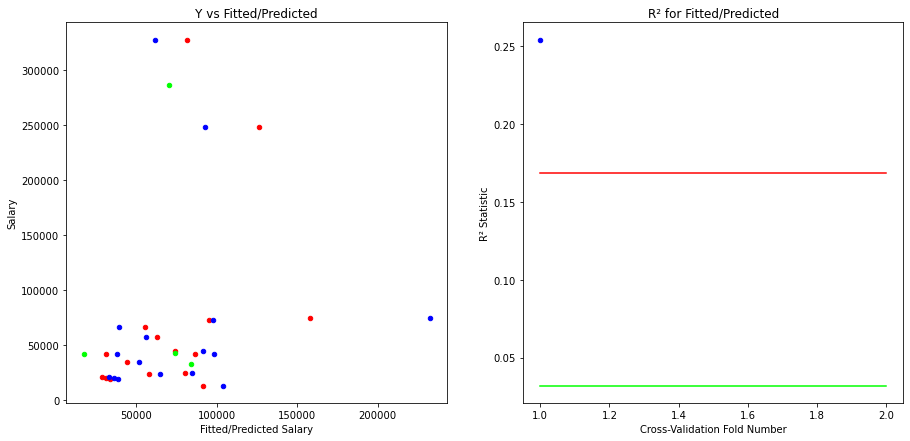

In [75]:
#K-Fold Cross-Validation Regression

#(May be adapted for methods other than Regression)

#n-Fold is same as Leave-One-Out.

#test_frac = fraction for Test-Set (Validation-Set)
#k = number of folds


import pandas as pd
d = d_new
print('Data has', len(d), 'rows.\n')

y = d['Salary']
print('y:')
print(y.head())

X = d.loc[:, ['Rating']]
print('\nX:')
print(X.head())

# create random training and test sets:
test_frac = 0.2
print('\nTest-Set size =', test_frac)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_frac)
print('\nX_train.shape =', str(X_train.shape) + ', y_train.shape =', y_train.shape)
print('X_test.shape =', str(X_test.shape) + ', y_test.shape =', y_test.shape)

print(f'\n\n\033[94m\033[1m' + 'Multiple Regression with Cross-Validation for', len(y_train),
      'obs (extra ' + str(len(y_test)) + ' obs in Test-Set):' + f'\033[0m' )

#fit whole training set:

from sklearn import linear_model
#n_jobs=-1 uses all CPUs
method = linear_model.LinearRegression(n_jobs=-1).fit(X_train, y_train) #a number of other sklearn options for method

R2_train_fit = method.score(X_train, y_train)
print('\nR² (fit-statistic) for the entire X_train-&-y_train sample:', R2_train_fit)

train_fit = method.predict(X_train)
print('\nFits for the entire X_train-&-y_train sample (1st 5 obs):')
print(train_fit[:5])

from matplotlib import pyplot as pl
%matplotlib inline

#http://matplotlib.org/3.1.3/gallery/subplots_axes_and_figures/subplots_demo.html
pl.rcParams['figure.figsize'] = 15, 7

#1st plot:

#pl.tight_layout() #didn't help produce plots closer together
pl.subplot(1, 2, 1)
pl.xlabel('Fitted/Predicted ' + y.name)
pl.ylabel(y.name)
pl.scatter(train_fit, y_train, s=20, c='red')

#fit k-fold cross-validation for training set:

k = min(6, len(y_train))
#k = len(y_train) #leave-one-out cross-validation

from sklearn.model_selection import KFold, cross_val_score, cross_val_predict

#cross_val_score returns each fold's R² for linear_model.LinearRegression()
#http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

#if just simply cv=f, then results will be the same across runs
#kFold(n_splits, shuffle, random_state); shuffle=True gives new folds each time
#n_jobs=-1 uses all CPUs

print('\nR² (fit-statistics) for all', k,
      'cross-validation Training-Sets within the larger X_train-&-y_train sample' +
      (' (1st 10 obs)' if k > 10 else '') + ':')

#ran = random.random() #should have some random_state for cross_val_score and cross_val_predict, but will not
#strangely gives negative value sometimes:
R2_kf = cross_val_score(method, X_train, y_train, cv=KFold(k, True), n_jobs=-1)
if k == len(y_train):
    print('(No output for Leave-One-Out Cross-Validation.)')
else:
    print(R2_kf[:10])

#cross-validated predictions for all folds:

#http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html
#each sample belongs to exactly one test set, and its prediction is computed with an estimator fitted on
#    the corresponding training set

kf_predict = cross_val_predict(method, X_train, y_train, cv=KFold(k, True), n_jobs=-1)
print('\nPredictions for all', k,
      'cross-validation Test-Sets within the larger X_train-&-y_train sample (1st 5 obs):')
print(kf_predict[:5])
pl.scatter(kf_predict, y_train, s=20, c='blue')

#true prediction of y_test by X_test:

test_predict = method.predict(X_test)
import numpy as np
R2_test = np.corrcoef(test_predict, y_test)[0, 1]**2 #by fluke, R2_test may be > R2_train_fit
#R2_test = method.score(X_test, y_test) #not the same
print('\nTest-Set prediction pseudo-R² = ', R2_test)

print('\nPredictions for the X_test sample (1st 5 obs):')
print(test_predict[:5])
pl.scatter(test_predict, y_test, s=20, c='lime')

print('\n\n\033[1mTrain-Set: ' +  f'\033[91m' + 'Red' + f'\033[0m\033[1m' + ',  ' + str(k) +
      '-Fold Cross-Validation Train-Sets: ' + f'\033[94m' +
      'Blue' + f'\033[0m\033[1m' + ',  '  + str(test_frac) + ' Test-Set: ' +  f'\033[92m' + 'Green' + f'\033[0m')
#pl.title('Train-Set Fit: Red,  Train-Set '
#         + str(k) + '-Fold Cross-Validation Prediction: Blue,  Test-Set Prediction: Green')
pl.title('Y vs Fitted/Predicted')
#pl.show()

#print R2:

import warnings
warnings.simplefilter('ignore')
R2_kf_gd = np.sum(R2_kf >= 0)

#2nd plot:

pl.subplot(1, 2, 2)
pl.plot([1, max(R2_kf_gd, 2)], [R2_train_fit, R2_train_fit], c='red')
if R2_kf_gd > 0:
    pl.scatter(np.arange(1, R2_kf_gd + 1), [x for x in R2_kf if x >= 0], s=20, c='blue')
pl.plot([1, max(R2_kf_gd, 2)], [R2_test, R2_test], c='lime')

pl.xlabel('Cross-Validation Fold Number')
pl.ylabel('R² Statistic')
#pl.title('Train-Set: Red,  '
#         + str(k) + '-Fold Cross-Validation Train-Sets: Blue,  Test-Set: Green')
pl.title('R² for Fitted/Predicted')

#for both plots:
pl.show()